In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import datasets, linear_model
import numpy as np

C:\Users\Samuel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def arrumapreco(valor):  #função que retira todos os sinais(emocotions continuam)
    if "M" in valor:
        valor=valor.replace("M","000000")
        valor=valor.replace("€","")
        if "." in valor:
            valor=valor.replace(".","")
            return int(valor)/10000000
        else:
            return int(valor)/1000000
    
    else:
        valor=valor.replace("K","000")
        valor=valor.replace("€","")
        if "." in valor:
            valor=valor.replace(".","")
            return int(valor)/1000000
        else:
            return int(valor)/1000000

def arrumaatt(att):
    if type(att) !=int:
        if "+" in att:
            att=att[:att.find("+")]
        elif "-" in att:
            att=att[:att.find("-")]
    return att

def arrumapos(pos):
    return pos.split()[0]



In [3]:
#Inicializa os datasets e arruma seus valores
df=pd.read_csv('Database\CompleteDataset.csv',index_col=0)
listtwitter = json.loads(open("followers.txt").read())
dft=pd.DataFrame(listtwitter,columns=["Name","Seguidores","Twitter"])
dfall = df.merge(dft, how = 'inner', on = ['Name'])
dfall=dfall.dropna()


features=["Acceleration","Agility","Ball control","Dribbling","Long shots","Marking","Reactions","Short passing","Shot power","Sliding tackle","Stamina","Strength","Volleys"]
features=["Acceleration","Aggression","Crossing","Dribbling","Finishing","Jumping","Long shots","Reactions","Stamina","Strength"]
features2=features+["Followers"]

dfall=dfall.rename(columns = {'Preferred Positions':'Positions'})

dfall.Value=dfall.Value.apply(arrumapreco)


dfall=dfall[(dfall.Value>1)]
dfall=dfall[(dfall.Positions == 'ST LW ') | (dfall.Positions == 'RW ') | (dfall.Positions == 'LW ') | (dfall.Positions == 'ST ')| (dfall.Positions == 'CF ')| (dfall.Positions == 'ST RW ')| (dfall.Positions == 'CAM ')]

for i in features:
    dfall[i]=dfall[i].apply(arrumaatt)

dfall

C:\Users\Samuel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RCM,RDM,RF,RM,RS,RW,RWB,ST,Seguidores,Twitter
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,...,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,64104546,@Cristiano
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,...,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,1424743,@messi10stats
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,...,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,35163756,@neymarjr
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,...,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,12380660,@LuisSuarez9
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92.0,...,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,981411,@lewy_official
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,90.5,...,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,5168450,@hazardeden10
9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,77.0,...,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0,6722354,@G_Higuain
16,G. Bale,27,https://cdn.sofifa.org/48/18/players/173731.png,Wales,https://cdn.sofifa.org/flags/50.png,89,89,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,69.5,...,81.0,71.0,87.0,87.0,87.0,87.0,74.0,87.0,15693471,@GarethBale11
17,S. Agüero,29,https://cdn.sofifa.org/48/18/players/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,66.5,...,75.0,54.0,87.0,84.0,86.0,86.0,57.0,86.0,12496406,@aguerosergiokun
24,P. Aubameyang,28,https://cdn.sofifa.org/48/18/players/188567.png,Gabon,https://cdn.sofifa.org/flags/115.png,88,88,Borussia Dortmund,https://cdn.sofifa.org/24/18/teams/22.png,61.0,...,74.0,59.0,84.0,83.0,85.0,84.0,65.0,85.0,741565,@Aubameyang7


In [4]:
X = dfall[features]
X2 = pd.concat([dfall[features],dfall.Seguidores],axis=1)
y = dfall.Value



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1, random_state=42)

In [5]:
regr = linear_model.LinearRegression()# cria o modelo
regr2 = linear_model.LinearRegression()

regr.fit(X_train, y_train) # treina o modelo
regr2.fit(X_train2, y_train2) # treina o modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

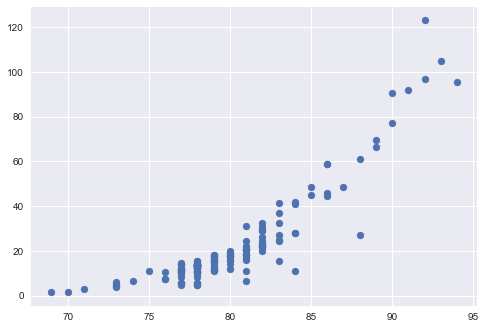

In [6]:
plt.scatter(dfall.Overall,dfall.Value)
plt.show()

In [7]:
#OLS
yy = y_train
XX = X_train
XX = sm.add_constant(XX)

model = sm.OLS(yy, XX.astype(float)).fit()
print(model.summary())

#OLS
yy2 = y_train2
XX2 = X_train2
XX2 = sm.add_constant(XX2)

model2 = sm.OLS(yy2, XX2.astype(float)).fit()
print()
print()
print()
print()
print()
print()
print(model2.summary())



                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     43.15
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           7.99e-36
Time:                        17:12:43   Log-Likelihood:                -506.86
No. Observations:                 136   AIC:                             1036.
Df Residuals:                     125   BIC:                             1068.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -307.6669     19.230    -15.999   

In [8]:
estim = regr.predict(X)
estim_seg = regr2.predict(X2)
dfall['Estim']=estim
dfall['Estim_Seg']=estim_seg
dfall[["Name","Estim","Value","Estim_Seg","Seguidores","Twitter"]]


,Name,Estim,Value,Estim_Seg,Seguidores,Twitter
0,Cristiano Ronaldo,84.252910,95.5,98.060604,64104546,@Cristiano
1,L. Messi,96.189695,105.0,92.246955,1424743,@messi10stats
2,Neymar,71.461595,123.0,80.194935,35163756,@neymarjr
3,L. Suárez,74.958805,97.0,75.659840,12380660,@LuisSuarez9
5,R. Lewandowski,63.915951,92.0,61.321622,981411,@lewy_official
7,E. Hazard,63.214172,90.5,62.444967,5168450,@hazardeden10
9,G. Higuaín,63.397558,77.0,61.979431,6722354,@G_Higuain
16,G. Bale,61.328409,69.5,61.891492,15693471,@GarethBale11
17,S. Agüero,67.375506,66.5,67.940901,12496406,@aguerosergiokun
24,P. Aubameyang,57.995329,61.0,54.592925,741565,@Aubameyang7


In [9]:
pd.Series(regr.predict(pd.concat([X_aux,X_test])))

NameError: name 'X_aux' is not defined

In [ ]:
#Inicializa os datasets e arruma seus valores
df=pd.read_csv('Database\CompleteDataset.csv',index_col=0)
listtwitter = json.loads(open("followers.txt").read())
dft=pd.DataFrame(listtwitter,columns=["Name","Seguidores","Twitter"])

dfall = df.merge(dft, how = 'inner', on = ['Name'])
print(dfall)
dfall=dfall.dropna()
dfall["index"]=dfall.index


features=["Acceleration","Agility","Ball control","Dribbling","Long shots","Marking","Reactions","Short passing","Shot power","Sliding tackle","Stamina","Strength","Volleys"]
features=["Acceleration","Aggression","Crossing","Dribbling","Finishing","Jumping","Long shots","Reactions","Strength"]
features2=features+["Followers"]

dfall=dfall.rename(columns = {'Preferred Positions':'Positions'})

dfall.Value=dfall.Value.apply(arrumapreco)
dfall=dfall[(dfall.Value>1)]

dfall.Positions=dfall.Positions.apply(arrumapos)

dfall=dfall[(dfall.Positions == 'RM') | (dfall.Positions == 'CAM') | (dfall.Positions == 'RM')| (dfall.Positions == 'LM')| (dfall.Positions == 'RW')| (dfall.Positions == 'LW')| (dfall.Positions == 'CF')| (dfall.Positions == 'ST')]



for i in features:
    dfall[i]=dfall[i].apply(arrumaatt)
